# Homework 1 - data validation & cleaning (deadline 31. 10. 2020)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can!

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  2. Check consistency (i.e. that same things are represented in the same way) of at least three features where you expect problems (include "Object Name" feature).
  3. Select some features where you expect integrity problems (describe your choice) and check integrity of those features. By integrity we mean correct logical relations between features (e.g. female names for females only).
  4. Convert at least five features to a proper data type. Choose at least one numeric, one categorical and one datetime.
  5. Find some outliers (describe your method).
  6. Detect missing data in at least three features, convert them to a proper representation (if they are already not), and impute missing values in at least one feature.

**If you do all this properly, you will obtain 16 points.** However, all your steps and following code have to be commented! 

To earn **two points** for extra activity you can do some of these:
  * Focus more precisely on cleaning of the "Medium" feature. Such if you like to use it in KNN based algorithms later.
  * Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature.

## Comments

  * Please follow the instructions from https://courses.fit.cvut.cz/MI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, she can (!) give you another chance to rework your homework and to obtain more points. However, this is not a given, so do your best! :)

# Loading and basic info about the data (task 1)

In [1]:
import pandas as pd
import numpy as np
import re

raw_data = pd.read_csv('openaccess/MetObjects.csv', dtype=object, encoding='utf8')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
raw_data.head(20)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,16429,Maker,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",NaN,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,NaN,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,NaN,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
5,67.265.12,False,False,False,6,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/6,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
6,67.265.13,False,False,False,7,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/7,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Birds|Coins,http://vocab.getty.edu/page/aat/300266506|http...,https://www.wikidata.org/wiki/Q5113|https://ww...
7,67.265.14,False,False,False,8,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474526 entries, 0 to 474525
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Object Number            474526 non-null  object
 1   Is Highlight             474526 non-null  object
 2   Is Timeline Work         474526 non-null  object
 3   Is Public Domain         474526 non-null  object
 4   Object ID                474526 non-null  object
 5   Gallery Number           54386 non-null   object
 6   Department               474526 non-null  object
 7   AccessionYear            470560 non-null  object
 8   Object Name              473172 non-null  object
 9   Title                    444655 non-null  object
 10  Culture                  206456 non-null  object
 11  Period                   90362 non-null   object
 12  Dynasty                  23144 non-null   object
 13  Reign                    11180 non-null   object
 14  Portfolio           

# Delete some data :)
In column 'Metadata Date' there is no data. Drop it.

In [5]:
raw_data.drop(columns=['Metadata Date'], axis=1, inplace=True)

In [6]:
raw_data.isnull().sum()

Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number             420140
Department                      0
AccessionYear                3966
Object Name                  1354
Title                       29871
Culture                    268070
Period                     384164
Dynasty                    451382
Reign                      463346
Portfolio                  451182
Constiuent ID              201854
Artist Role                203948
Artist Prefix              385223
Artist Display Name        201854
Artist Display Bio         240901
Artist Suffix              462598
Artist Alpha Sort          201889
Artist Nationality         292113
Artist Begin Date          238300
Artist End Date            238306
Artist Gender              373481
Artist ULAN URL            270561
Artist Wikidata URL        314629
Object Date                 14912
Object Begin D

There are many columns and many NaN values in the dataset. I have decided to delete the rows, which have a lot of missing data.

In [7]:
percent_of_nan = raw_data.isnull().sum(axis=1) / len(raw_data)

In [8]:
percent_of_nan.hist()

Let's try to delete the rows which have more than 2/3 of information unfilled. It's about 3% of the data, so it shouldn't be a big data loss.

In [9]:
len(raw_data[percent_of_nan > 2/3]) / len(raw_data)

0.030152193978833616

In [10]:
raw_data = raw_data[percent_of_nan <= 2/3]
print(len(raw_data))
raw_data.isnull().sum()

460218


Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number             405833
Department                      0
AccessionYear                3641
Object Name                  1327
Title                       29212
Culture                    266722
Period                     369866
Dynasty                    437074
Reign                      449038
Portfolio                  436874
Constiuent ID              187550
Artist Role                189640
Artist Prefix              370915
Artist Display Name        187550
Artist Display Bio         226593
Artist Suffix              448290
Artist Alpha Sort          187585
Artist Nationality         277805
Artist Begin Date          223992
Artist End Date            223998
Artist Gender              359173
Artist ULAN URL            256254
Artist Wikidata URL        300321
Object Date                 13517
Object Begin D

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460218 entries, 0 to 474525
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Object Number            460218 non-null  object
 1   Is Highlight             460218 non-null  object
 2   Is Timeline Work         460218 non-null  object
 3   Is Public Domain         460218 non-null  object
 4   Object ID                460218 non-null  object
 5   Gallery Number           54385 non-null   object
 6   Department               460218 non-null  object
 7   AccessionYear            456577 non-null  object
 8   Object Name              458891 non-null  object
 9   Title                    431006 non-null  object
 10  Culture                  193496 non-null  object
 11  Period                   90352 non-null   object
 12  Dynasty                  23144 non-null   object
 13  Reign                    11180 non-null   object
 14  Portfolio           

# Check consistency
## 'Object Name' column consistency (task 2: 1/3)

All data to lowercase.

In [12]:
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.lower()

In [13]:
raw_data.loc[:, 'Object Name Lenght'] = raw_data['Object Name'].str.len()

some values are NaN

Check shortest names - they seem to be valid.

In [14]:
raw_data.nsmallest(1000, 'Object Name Lenght')['Object Name'].unique()

array(['ax', 'as', 'po', 'lo', 'bo', 'gu', 'ūd', 'ty', 'so', 'em', 'se',
       'yu', 'mug', 'keg', 'cup', 'box', 'jar', 'pin', 'urn', 'jug',
       'die', 'fan', 'toy', 'key', 'lid', 'map', 'tyg', 'pan', 'pot',
       'rug', 'hat', 'ale', 'bit', 'bow', 'cap', 'axe', 'saw', 'gun',
       'mat', 'qin'], dtype=object)

List longest names

In [15]:
raw_data.nlargest(1000, 'Object Name Lenght')['Object Name'].unique()

array(['double-barreled flintlock shotgun with exchangeable percussion locks and barrels',
       'nineteen ornamental fittings from a horse harness and an ornamental saddle plate',
       'ammunition belt (kamr) object cards.  s. martz, 11.with powder flask and pouches',
       'blade and for a hatchet (nata) and mounting for a dagger (chiisagatana-goshirae)',
       'set of pommel (fuchigashira), sword grip ornaments (menuki), and cord (kurikata)',
       'top two lames from a right thigh defense (cuisse), possibly from armor for a boy',
       'pall, sheet, wah, rather coarse, light weight, weft fringe, torn ends, very worn',
       'string of 16 spherical, 1 barrel and 1 cylindrical beads and 2 hippo head amulet',
       'cone, round, padiamunnebnesuttawy, chancellor, amun, lector, priest beniuutehhor',
       'scarab, menkheperra, nsw bit, royal title, mry imn, beloved of amun, thutmose ii',
       'cone, ptahmose, circular impression, high priest of amun, vizier, overseer, town',

To fix:
- '\r\n'
- ';' vs ','
- 'italic tags
- parentheses () vs [] (or delete them?)
- question marks, exclamation marks

In [16]:
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.replace('\r\n', '')
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.replace(';', ',')
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.replace('<i>', '')
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.replace('</i>', '')
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.replace('(', '')
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.replace(')', '')
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.replace('[', '')
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.replace(']', '')
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.replace('?', '')
raw_data.loc[:, 'Object Name'] = raw_data['Object Name'].str.replace('!', '')

Also, there is an option to delete all 1327 rows which have no 'Object Name' filled (or even try to fill NaN by 'Title' column, which is quite similar - this could be done in 1309 rows). Depends if needed for the task (data extraction)

In [17]:
raw_data[(raw_data['Object Name'].isnull() & raw_data['Title'].notnull())]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object Name Lenght
163966,33.65.1–.591,False,False,False,267878,NaN,Photographs,1933,NaN,[Views of the American Civil War],NaN,NaN,NaN,NaN,NaN,1656035580116998655796557951651651653441656915...,Artist|Artist|Artist|Artist|Artist|Artist|Arti...,NaN,John Reekie|James F. Gibson|Unknown|Thomas C. ...,"American, active 1860s|American, born 1828|Ame...",NaN,"Reekie, John|Gibson, James F.|Unknown|Roche, T...",American|American|American|American|American|A...,1860 |1828 |1826 |1819 |18...,1869 |1905 |1895 |1867 |19...,||||||||||||,http://vocab.getty.edu/page/ulan/500057445|htt...,https://www.wikidata.org/wiki/Q41692082|https:...,1861–65,1861,1865,Albumen silver prints,NaN,"Harris Brisbane Dick Fund, 1933",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albums,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,NaN
165156,47.149.40,False,False,True,269111,NaN,Photographs,1947,NaN,The Imperial Court of Napoleon III,NaN,NaN,NaN,NaN,NaN,16389,Artist,NaN,André-Adolphe-Eugène Disdéri,"French, Paris 1819–1889 Paris",NaN,"Disdéri, André-Adolphe-Eugène",French,1819,1889,NaN,http://vocab.getty.edu/page/ulan/500118847,https://www.wikidata.org/wiki/Q515461,"ca. 1866, printed 1940s",1861,1871,Gelatin silver print,Image: 12.8 x 8 cm (5 1/16 x 3 1/8 in.)\r\nFra...,"David Hunter McAlpin Fund, 1947",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Photographs,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",Men|Women,http://vocab.getty.edu/page/aat/300025928|http...,https://www.wikidata.org/wiki/Q8441|https://ww...,NaN
175710,2005.100.1375,False,False,False,283100,NaN,Photographs,1999,NaN,Illustrations to Tennyson's Idylls of the King...,NaN,NaN,NaN,NaN,NaN,5493,Artist,NaN,Julia Margaret Cameron,"British (born India), Calcutta 1815–1879 Kalut...",NaN,"Cameron, Julia Margaret",NaN,1815,1879,Female,http://vocab.getty.edu/page/ulan/500118804,https://www.wikidata.org/wiki/Q230120,1874,1874,1874,Albumen silver prints from glass negatives,30.9 x 25.9 cm (12 3/16 x 10 3/16 in. ),"Gilman Collection, Museum Purchase, 2005",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albums,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q96181759,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,NaN
178117,2005.100.1336,False,False,False,285612,NaN,Photographs,2005,NaN,"Puyo, Demachy, and de Singly",NaN,NaN,NaN,NaN,NaN,5540,Artist,NaN,Emile Joachim Constant Puyo,"French, 1857–1933",NaN,"Puyo, Emile Joachim Constant",NaN,1857,1933,NaN,http://vocab.getty.edu/page/ulan/500034675,https://www.wikidata.org/wiki/Q650368,ca. 1909,1907,1911,Gelatin silver print,2 7/8 x 3 3/16,"Gilman Collection, Purchase, Harriette and Noe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Photographs,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,NaN
178152,2005.100.1373,False,False,False,285654,NaN,Photographs,2005,NaN,Ricordo della Canonizzazione in Roma,NaN,NaN,NaN,NaN,NaN,5952,Artist,NaN,Count Luigi Primoli,"Italian, 1851–1925",NaN,"Primoli, Luigi, Count",NaN,1851,1925,NaN,NaN,NaN,1880s,1880,1889,Gelatin silver bromide print,3 x 2 3/4,"Gilman Collection, Museum Purchase, 2005",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Photographs,NaN,http

## 'Object Number' column consistency (task 2: 2/3)
Try to find some regex, probably something like: numbers.numbers.numbers(letter)?
    --> '^\d+\.?\d+(\.\d+)?(\w?|(\w-\w)|(\w, \w))?$'

Also seems like prefix 'Inst.' is valid


Some rows contain more objects, their numbers are given like this: 46.67.54a, .50b 
(which means two numbers: 46.67.54a, 46.67.50b) 
Consider splitting.

Some object numbers contain 'recto' or 'verso', which should be (in my opinion) a new column

In [18]:
bool_list = raw_data['Object Number'].str.contains('^\d+\.?\d+(\.\d+)?(\w?|(\w-\w)|(\w, \w))?$')

raw_data[~bool_list].head(100)

/home/dolanver/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object Name Lenght
34,04.1a–c,True,True,False,35,706,The American Wing,1904,vase,The Adams Vase,American,NaN,NaN,NaN,NaN,108316253,Designer|Manufacturer,Designed by|Manufactured by,Paulding Farnham|Tiffany & Co.,1859–1927|1837–present,NaN,"Farnham, Paulding|Tiffany & Co.",NaN,1859 |1837,1927 |9999,|,http://vocab.getty.edu/page/ulan/500336597|htt...,|,1893–95,1893,1895,"Gold, amethysts, spessartites, tourmalines, fr...",Overall: 19 7/16 x 13 x 9 1/4 in. (49.4 x 33 x...,"Gift of Edward D. Adams, 1904",Made in,New York,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/35,https://www.wikidata.org/wiki/Q83545838,"Metropolitan Museum of Art, New York, NY",Animals|Garlands|Birds|Men,http://vocab.getty.edu/page/aat/300249525|http...,https://www.wikidata.org/wiki/Q729|https://www...,4.0
123,Inst.68.4.1,False,False,False,132,726,The American Wing,NaN,architectural elements,"Architectural elements from Halsted House, Rye...",American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 1825,1822,1825,"Wood, marble",Dimensions unavailable,"Gift of Henry U. and Emma B. Halsted, 1968",Made in,Rye,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Architecture,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q96358236,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,22.0
137,50.130.149u recto,False,False,False,150,NaN,The American Wing,1950,drawing,Heads and Feet of Two Javanese Dancers (from S...,American,NaN,NaN,NaN,NaN,16237,Artist,NaN,John Singer Sargent,"American, Florence 1856–1925 London",NaN,"Sargent, John Singer",American,1856,1925,NaN,http://vocab.getty.edu/page/ulan/500023972,https://www.wikidata.org/wiki/Q155626,1889,1889,1889,Graphite on off-white wove paper,5 1/2 x 8 1/2 in. (14 x 21.6 cm),"Gift of Mrs. Francis Ormond, 1950",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",Feet|Heads|Dancers,http://vocab.getty.edu/page/aat/300310200|http...,https://www.wikidata.org/wiki/Q15807|https://w...,7.0
142,10.125.666 L,False,False,True,170,NaN,The American Wing,1910,armchair,Armchair,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750–75,1750,1775,"Hickory, pine",38 1/4 x 25 1/2 x 15 in. (97.2 x 64.8 x 38.1 cm),"Gift of Mrs. Russell Sage, 1909",Made in,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8.0
163,50.130.154ss,False,False,False,194,NaN,The American Wing,1950,drawing,"Hunting Birds, after Egyptian Relief Sculpture...",American,NaN,NaN,NaN,NaN,16237,Artist,NaN,John Singer Sargent,"American, Florence 1856–1925 London",NaN,"Sargent, John Singer",American,1856,1925,NaN,http://vocab.getty.edu/page/ulan/500023972,https://www.wikidata.org/wiki/Q155626,ca. 1878,1875,1878,Graphite and pen and ink on off-white wove paper,5 1/4 x 4 3/4 in. (13.3 x 12.1 cm),"Gift of Mrs. Francis Ormond, 1950",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",Birds|Men|Women|Hieroglyphs|Hunting,http://vocab.getty.edu/page/aat/300266506|http

## 'AccessionYear' column consistency (task 2: 3/3)
The Metropolitan Museum was established in year 1870. Check that all data is a 4-digit number >= 1870

Some values are NaN, but just few of them. In case we needed all accession years defined, there is no problem to drop them (SPOILER ALERT: or try to fill them :) )

In [19]:
bool_list = raw_data['AccessionYear'].fillna('').str.contains('^\d{1,4}$')

raw_data['AccessionYear'][~bool_list].unique()

array([nan, '2005-02-15'], dtype=object)

In [20]:
raw_data.loc[:, 'AccessionYear'].replace('2005-02-15', '2005', inplace=True)

## Bonus: 'Is Highlight' column consistency (task 2: 4/3)
This column is consistent :)

In [21]:
raw_data['Is Highlight'].unique()

array(['False', 'True'], dtype=object)

# Integrity problems

In [22]:
raw_data.head(10)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object Name Lenght
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,16429,Maker,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",NaN,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,NaN,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,NaN,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
5,67.265.12,False,False,False,6,NaN,The American Wing,1967,coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/6,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
6,67.265.13,False,False,False,7,NaN,The American Wing,1967,coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/7,NaN,"Metropolitan Museum of Art, New York, NY",Birds|Coins,http://vocab.getty.edu/page/aat/300266506|http...,https://www.wikidata.org/wiki/Q5113|https://ww...,4.0
7,67.265.14,False,False,False,8,NaN,The American Wing,1967,coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,N

## 'Object Date', 'Object Begin Date', 'Object End Date' columns integrity (task 3: 1/2)

Check that 'Object Begin Date' <= 'Object End Date'

'Object Date' should match the 'Object Begin Date' and 'Object End Date'

NaNs:

Object Date:                13517 <br>
Object Begin Date:            0 <br>
Object End Date:              0 <br>

If 'Object Date' is NaN, we can fill in according to 'Object Begin Date' and 'Object End Date' columns

### 'Object Begin Date', 'Object End Date' NaNs (task 6: 1/3)
I noticed that there is year 0 in the columns - year 0 doesn't exist Probably 0 stands for unknown/undefined. Let's fix it.

Firstly, convert object type to integer type (python's Datetime doesn't support years B.C.)

In [23]:
raw_data.loc[:, 'Object Begin Date'] = pd.to_numeric(raw_data['Object Begin Date'])
raw_data.loc[:, 'Object End Date'] = pd.to_numeric(raw_data['Object End Date'])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460218 entries, 0 to 474525
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            460218 non-null  object 
 1   Is Highlight             460218 non-null  object 
 2   Is Timeline Work         460218 non-null  object 
 3   Is Public Domain         460218 non-null  object 
 4   Object ID                460218 non-null  object 
 5   Gallery Number           54385 non-null   object 
 6   Department               460218 non-null  object 
 7   AccessionYear            456577 non-null  object 
 8   Object Name              458891 non-null  object 
 9   Title                    431006 non-null  object 
 10  Culture                  193496 non-null  object 
 11  Period                   90352 non-null   object 
 12  Dynasty                  23144 non-null   object 
 13  Reign                    11180 non-null   object 
 14  Port

In [24]:
raw_data.loc[raw_data['Object Begin Date'] == 0, 'Object Begin Date'] = np.nan
raw_data.loc[raw_data['Object End Date'] == 0, 'Object End Date'] = np.nan
# raw_data.isnull().sum()

### Continue with the integrity check
Show the dates where 'Object Begin Date' > 'Object End Date'

In [25]:
raw_data[raw_data['Object Begin Date'] > raw_data['Object End Date']]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object Name Lenght
32730,1988.354,True,True,True,38468,234,Asian Art,1988,yaksha,NaN,"India, Madhya Pradesh",Shunga period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 50 B.C.,-45.0,-55.0,Sandstone,H. 35 in. (88.9 cm); W. 18 in. (45.7 cm); D. 1...,"Gift of Jeffrey B. Soref, in honor of Martin L...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q29383272,"Metropolitan Museum of Art, New York, NY",Shunga,http://vocab.getty.edu/page/aat/300018880,Shung preferred term of MMA Asian Art dept.,6.0
47446,JP3180,False,False,True,55128,NaN,Asian Art,1959,print,NaN,Japan,Edo period (1615–1868),NaN,NaN,NaN,16545,Artist,NaN,Utagawa (Gountei) Sadahide,"Japanese, 1807–1878/79",NaN,Utagawa (Goutei) Sadahide,Japanese,1807,1879,NaN,http://vocab.getty.edu/page/ulan/500072517,NaN,"1861, 9th month",1861.0,9.0,Middle panel of a triptych of woodblock prints...,O-ban triptych with JP3179,"Gift of Lincoln Kirstein, 1959",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,5.0
118850,24.80.29,False,False,True,209514,NaN,European Sculpture and Decorative Arts,1924,fan,Fan,Italian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,late 18th century,1785.0,1779.0,Skin and ivory,8 3/4 x 16 3/4 in. (22.2 x 42.5 cm),"Bequest of Mary Clark Thompson, 1923",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fans,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",Boats,http://vocab.getty.edu/page/aat/300178749,https://www.wikidata.org/wiki/Q35872,3.0
136473,1985.151.1b,False,False,True,229879,NaN,European Sculpture and Decorative Arts,1985,sample and letter,Textile swatch to accompany letter,French,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,late 18th century,1785.0,1773.0,NaN,NaN,"Purchase, 1985, Funds From Various Donors",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Textiles-Woven,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",Correspondence,http://vocab.getty.edu/page/aat/300026877,https://www.wikidata.org/wiki/Q1784733,17.0
138526,2010.500.4a–e,False,False,False,237874,NaN,European Sculpture and Decorative Arts,2010,fragments,Fragments with European grotesque designs,Chinese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,late 18th century,1785.0,1779.0,"Silk, embroidered satin weave",NaN,"Gift of Titi Halle, 2010",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Textiles-Embroidered,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,9.0
146545,"06.1021.217a, b",False,False,False,247380,NaN,Greek and Roman Art,1906,lebes gamikos,Lebes gamikos,"Greek, South Italian, Apulian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4th century B.C.,-399.0,-3000.0,Terracotta,Diam.: 11 7/8 x 14 1/2 in. (30.2 x 36.8 cm),"Rogers Fund, 1906",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vases,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,13.0
148265,17.46.1,False,False,True,249163,159,Greek and Roman Art

What to do with these 148 rows? We can see that 0 is often used as unknown/undefined value.

In many rows there is additional information in 'Object Date' column. This is often written in English, using specifications like 'B.C', 'century', 'late', 'ca.', 'second half',...

Watching these notes can determine the mistakes in the data, but would be difficult to analyze by machine:

Switching the begin and end year (Date = 1800–1875, Begin Date = 1875, End Date = 1870) <br>
Date in centuries, not years (Date = 5th–1st century B.C., Begin Date = 5, End Date = 0) <br>
Forgetting the negative sign (Date = 3rd century B.C., Begin Date = 299, End Date = 200) <br>
Some random and absolutely unexplainable mistakes: (Date = 1861, 9th month, Begin Date = 1861, End Date = 9) <br>
(Date = 664–332 B.C, Begin Date = -664, End Date = -688)

Some easy checks could be applied, e. g. when Date contains 'B.C', Begin Date and End Date have to be negative, or when contains 'century/centuries', Begin Date and End Date have to be >= 100 <br>
<br>
Dropping them is an option as well.

## 'Artist Nationality' and 'Artist Display Bio' integrity (task 3: 2/2)
Display Bio often starts with nationality?

List all rows where beginning of 'Artist Nationality' does not match the beginning of 'Artist Display Bio' 

In [26]:
raw_data[raw_data['Artist Display Bio'].map(lambda x: re.findall('\w+|$', str(x))[0]) != raw_data['Artist Nationality'].map(lambda x: re.findall('\w+|$', str(x))[0])]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object Name Lenght
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,NaN,1901,1901.0,1901.0,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
9,1979.486.3,False,False,False,10,NaN,The American Wing,1979,coin,Two-and-a-half-dollar Indian Head Coin,NaN,NaN,NaN,NaN,NaN,108,Maker,NaN,Bela Lyon Pratt,1867–1917,NaN,"Pratt, Bela Lyon",NaN,1867,1917,NaN,http://vocab.getty.edu/page/ulan/500095555,NaN,1912,1912.0,1912.0,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/10,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
10,1979.486.2,False,False,False,11,NaN,The American Wing,1979,coin,Two-and-a-half-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,NaN,1907,1907.0,1907.0,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/11,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
12,1979.486.4,False,False,False,13,NaN,The American Wing,1979,coin,Five-dollar Indian Head Coin,NaN,NaN,NaN,NaN,NaN,108,Maker,NaN,Bela Lyon Pratt,1867–1917,NaN,"Pratt, Bela Lyon",NaN,1867,1917,NaN,http://vocab.getty.edu/page/ulan/500095555,NaN,1910,1910.0,1910.0,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/13,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
13,1979.486.5,False,False,False,14,NaN,The American Wing,1979,coin,Five-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,NaN,1907,1907.0,1907.0,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/14,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474514,Z997 .R887 1912,True,False,True,845711,NaN,The Libraries,NaN,NaN,"A catalogue of the library of the late John, D...",NaN,NaN,NaN,NaN,NaN,21423980627789507829,Subject of book|Author|Publisher|Printer,NaN,John Ker Roxburghe|Robert Harding Evans|G. and...,"British, 1778–1857|London|London",NaN,"Roxburghe, John Ker|Evans, Robert Harding|Nico...",NaN,1740 |1778 |1750 |1750,1804 |1857 |1899 |1899,|||,|||,|||,1812,1812.0,1812.0,NaN,"xxiv, 284 pages, i.e. 283 unnumbered pages : m...","Bequest of Mrs. Charles Wrightsman, 2019",NaN,London,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN,NaN,|

Exclude those rows where one of these columns is NaN

In [27]:
def do_intersect(lst1, lst2): 
    return bool(set(lst1).intersection(lst2))

raw_data_without_artist_nan = raw_data[(raw_data['Artist Display Bio'].notnull()) & (raw_data['Artist Nationality'].notnull())]

inconsistent = raw_data_without_artist_nan[raw_data_without_artist_nan['Artist Display Bio'].map(lambda x: re.findall('\w+|$', str(x))[0]) != raw_data_without_artist_nan['Artist Nationality'].map(lambda x: re.findall('\w+|$', str(x))[0])]

print(raw_data_without_artist_nan.shape)
print(inconsistent.shape)

(173599, 54)
(11221, 54)


173599 rows have both 'Artist Display Bio' and 'Artist Nationality'
In previous cell I have checked if the 'Artist Display Bio' starts with nationality. This approach is not very good, as nationality could be anywhere in the bio. In following cell I try to match nationality anywhere in the bio (and if there are more nationalities, then I try to match any of them)

In [28]:
bio = raw_data_without_artist_nan['Artist Display Bio'].map(lambda x: re.findall('\w+', str(x)))
nat = raw_data_without_artist_nan['Artist Nationality'].map(lambda x: re.findall('\w+', str(x)))

bool_list = []
for b, n in zip(bio, nat):
    bool_list.append(not do_intersect(b, n))
    
print(raw_data_without_artist_nan[bool_list].shape)
raw_data_without_artist_nan[bool_list].head(100)

(5971, 54)


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object Name Lenght
179,1986.204,True,True,True,214,736,The American Wing,1986,armchair,Armchair,American,NaN,NaN,NaN,NaN,345,Maker,Possibly,Gustave Herter,1830–1898,NaN,"Herter, Gustave","German (Stuttgart, principality of Württemberg)",1830,1898,NaN,http://vocab.getty.edu/page/ulan/500088027,NaN,ca. 1855,1852.0,1858.0,Walnut,64 1/2 x 25 3/8 x 22 1/4 in. (163.8 x 64.5 x 5...,"Friends of the American Wing Fund, 1986",Probably made in,New York,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q83560001,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8.0
191,68.69.2,False,False,True,227,736,The American Wing,1968,armchair,Armchair,American,NaN,NaN,NaN,NaN,111,Maker,NaN,Léon Marcotte,1824–1887,NaN,"Marcotte, Léon",French,1824,1887,NaN,http://vocab.getty.edu/page/ulan/500026799,NaN,ca. 1860,1857.0,1860.0,"Maple, gilt bronze",40 3/4 x 25 1/2 x 20 in. (103.5 x 64.8 x 50.8 cm),"Gift of Mrs. D. Chester Noyes, 1968",Made in,New York,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8.0
192,68.165.4,False,False,False,228,736,The American Wing,1968,armchair,Armchair,American,NaN,NaN,NaN,NaN,111,Maker,NaN,Léon Marcotte,1824–1887,NaN,"Marcotte, Léon",French,1824,1887,NaN,http://vocab.getty.edu/page/ulan/500026799,NaN,ca. 1860,1857.0,1860.0,Maple,40 1/2 x 26 x 24 3/4 in. (102.9 x 66 x 62.9 cm),"Gift of Mrs. Douglas M. Moffat, 1968",Made in,New York,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8.0
198,69.175,False,False,True,234,732,The American Wing,1969,armchair,Armchair,American,NaN,NaN,NaN,NaN,111,Maker,Attributed to the Workshop of,Duncan Phyfe,"British, near Lock Fannich, Ross-Shire, Scotla...",NaN,"Phyfe, Duncan",Scottish,1770,1854,NaN,http://vocab.getty.edu/page/ulan/500082047,https://www.wikidata.org/wiki/Q3041258,ca. 1835,1832.0,1835.0,Rosewood,33 1/4 x 24 x 20 in. (84.5 x 61 x 50.8 cm),"Rogers Fund, 1969",Made in,New York,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8.0
208,68.133.2,False,False,True,246,737,The American Wing,1968,armchair,Armchair,American,NaN,NaN,NaN,NaN,112,Maker,Attributed to,John Jelliff,1813–1893,NaN,"Jelliff, John",American,1813,1893,NaN,http://vocab.getty.edu/page/ulan/500062668,NaN,1868–70,1868.0,1870.0,"Rosewood, ash, mother-of-pearl",44 1/2 x 28 1/2 x 29 3/8 in. (113 x 72.4 x 74....,"Gift of Josephine M. Fiala, 1968",Made in,Newark,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8.0
209,68.133.3,False,True,True,247,737,The American Wing,1968,armchair,Armchair,American,NaN,NaN,NaN,NaN,112,Maker,Attributed to,John Jelliff,1813–1893,NaN,"Jelliff, John",American,1813,1893,NaN,http://vocab.getty.edu/page/ulan/500062668,NaN,1868–70,1868.0,1870.0,"Rosewood, ash, mother-of-pearl",44 1/2 x 28 1/2 x 29 3/8 in. (113 x 72.4 x 74....,"Gift of Josephine M. Fiala, 1968",Made in,Newark,NaN,NaN

Now only 5971 rows are 'inconsistent'. By watching the data, the most cases of this 'incostistency' happens when: <br>
-> there is no nationality in the bio (e. g. only '1830–1898') <br>
-> mixing up 'British' and 'Scottish'

I conclude that these two columns haven't got integrity problems.

# Convert to a proper data type
## 'Object ID' (Integer) (task 4: 1/5)

In [29]:
raw_data.loc[:, 'Object ID'] = pd.to_numeric(raw_data['Object ID'])

## 'Object Begin Date' and 'Object End Date' (Integers) (task 4: 2/5 & 3/5)
The conversion was done as a part of data integrity check. Despite the fact that it's a year, it was converted to integer, because python Datetime doesn't support B.C.

## 'Department' (Category) (task 4: 4/5)
There are 19 departments and there are no NaN values... ideal :)

In [30]:
len(raw_data['Department'].unique())

19

In [31]:
raw_data.loc[:, 'Department'] = raw_data['Department'].astype('category')

In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460218 entries, 0 to 474525
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Object Number            460218 non-null  object  
 1   Is Highlight             460218 non-null  object  
 2   Is Timeline Work         460218 non-null  object  
 3   Is Public Domain         460218 non-null  object  
 4   Object ID                460218 non-null  int64   
 5   Gallery Number           54385 non-null   object  
 6   Department               460218 non-null  category
 7   AccessionYear            456577 non-null  object  
 8   Object Name              458891 non-null  object  
 9   Title                    431006 non-null  object  
 10  Culture                  193496 non-null  object  
 11  Period                   90352 non-null   object  
 12  Dynasty                  23144 non-null   object  
 13  Reign                    11180 non-null   ob

## Filling in missing data in 'AccessionYear' by 'Credit Line' and median (task 6: 2/3)
In 'AccessionYear' column, there are 3641 missing data (NaNs), but only 342 are missing in 'Credit Line', where is often mentioned the year of the handover of the gift to the museum. Let's try to check how many data we can fill in.

In [33]:
df_acc_year = raw_data[(raw_data['Credit Line'].notnull()) & (raw_data['AccessionYear'].isnull())]
df_acc_year.shape

(3451, 54)

Parse a year (4-digit number) from the Credit Line. Also check if the year is >= 1870 (When the museum was established).

In [34]:
def parse_year(x):
    try:
        return re.findall('\d{4}', str(x))[0] if int(re.findall('\d{4}', str(x))[0]) >= 1870 else np.nan
    except IndexError:
        return np.nan

years_in_credit = df_acc_year['Credit Line'].map(parse_year)
display(years_in_credit.head(10))
years_in_credit.notnull().sum()

123     1968
394     1983
454     1986
711      NaN
1255    1967
1256    1967
1257    1967
1258    1967
1259    1967
1260    1967
Name: Credit Line, dtype: object

1029

Bingo :) We can fill in 1029 values.

In [35]:
raw_data.loc[(raw_data['Credit Line'].notnull()) & (raw_data['AccessionYear'].isnull()), 'AccessionYear'] = years_in_credit

In [36]:
raw_data[raw_data['AccessionYear'].isnull()].shape

(2612, 54)

The rest (2612 rows) we can either delete, or fill in using different techniques. One of them is surely KNN, but for this purpose I will use a median of the accession year of the objects from the same department. Unfortunately the distribution of the object between departments isn't equal, but could be worse.

In [37]:
pd.to_numeric(raw_data[raw_data['AccessionYear'].notnull()]['AccessionYear']).median()

1957.0

In [38]:
raw_data_accessionYear_not_null = raw_data[raw_data['AccessionYear'].notnull()]
raw_data_accessionYear_not_null.AccessionYear = raw_data_accessionYear_not_null.AccessionYear.astype('int64')

raw_data_accessionYear_not_null.groupby('Department').size()

/home/dolanver/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Department
Ancient Near Eastern Art                       6151
Arms and Armor                                13552
Arts of Africa, Oceania, and the Americas     12252
Asian Art                                     35650
Costume Institute                             19599
Drawings and Prints                          164748
Egyptian Art                                  27371
European Paintings                             2596
European Sculpture and Decorative Arts        42049
Greek and Roman Art                           32791
Islamic Art                                   15184
Medieval Art                                   7051
Modern and Contemporary Art                   13920
Musical Instruments                            5025
Photographs                                   36595
Robert Lehman Collection                       2585
The American Wing                             18099
The Cloisters                                  2312
The Libraries                                    76
d

In [39]:
median_year_table = raw_data_accessionYear_not_null.groupby('Department').median()
median_year_table

,Object ID,AccessionYear,Object Begin Date,Object End Date,Object Name Lenght
Department,,,,,
Ancient Near Eastern Art,324691.0,1957.0,-900.0,-612.0,8.0
Arms and Armor,29165.5,1936.0,1595.0,1800.0,19.0
"Arts of Africa, Oceania, and the Americas",313821.5,1979.0,1760.0,1890.0,6.0
Asian Art,56194.5,1932.0,1700.0,1799.0,6.0
Costume Institute,113065.0,1996.0,1953.0,1957.0,7.0
Drawings and Prints,422528.5,1960.0,1850.0,1870.0,5.0
Egyptian Art,558982.0,1920.0,-1390.0,-1390.0,19.0
European Paintings,437073.5,1949.0,1757.5,1770.0,8.0
European Sculpture and Decorative Arts,208440.0,1933.0,1745.0,1799.0,6.0


In [40]:
year_dict = pd.Series(median_year_table['AccessionYear'], index=median_year_table.index).to_dict()

In [41]:
for dep in year_dict.keys():
    raw_data.loc[(raw_data['AccessionYear'].isnull()) & (raw_data['Department'] == dep), 'AccessionYear'] = int(year_dict[dep])
    
raw_data['AccessionYear'].isnull().sum()

0

## Converting 'AccessionYear' to a DateTime (task 4: 5/5)
Now, there are no missing data in 'AccessionYear', so we can convert it to a proper data type.

In [42]:
raw_data['AccessionYear'] = pd.to_datetime(raw_data['AccessionYear'], format='%Y')

## Detection of other missing data (task 6: 3/3)
Well, data are missing in all columns containing NaN

In [43]:
raw_data.isnull().sum()

Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number             405833
Department                      0
AccessionYear                   0
Object Name                  1327
Title                       29212
Culture                    266722
Period                     369866
Dynasty                    437074
Reign                      449038
Portfolio                  436874
Constiuent ID              187550
Artist Role                189640
Artist Prefix              370915
Artist Display Name        187550
Artist Display Bio         226593
Artist Suffix              448290
Artist Alpha Sort          187585
Artist Nationality         277805
Artist Begin Date          223992
Artist End Date            223998
Artist Gender              359173
Artist ULAN URL            256254
Artist Wikidata URL        300321
Object Date                 13517
Object Begin D

In [44]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460218 entries, 0 to 474525
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            460218 non-null  object        
 1   Is Highlight             460218 non-null  object        
 2   Is Timeline Work         460218 non-null  object        
 3   Is Public Domain         460218 non-null  object        
 4   Object ID                460218 non-null  int64         
 5   Gallery Number           54385 non-null   object        
 6   Department               460218 non-null  category      
 7   AccessionYear            460218 non-null  datetime64[ns]
 8   Object Name              458891 non-null  object        
 9   Title                    431006 non-null  object        
 10  Culture                  193496 non-null  object        
 11  Period                   90352 non-null   object        
 12  Dynasty         

# Bonus: Extraction of physical dimensions
Dimensions in this dataset are in one column written as a string. Also, they are given both in inches as well as centimeters.

Let's see how the data looks like.

In [45]:
raw_data['Dimensions']

0                                    Dimensions unavailable
1                                    Dimensions unavailable
2                                  Diam. 11/16 in. (1.7 cm)
3                                  Diam. 11/16 in. (1.7 cm)
4                                  Diam. 11/16 in. (1.7 cm)
                                ...                        
474521    Overall (each): 37 1/4 × 74 1/2 × 7 7/8 in. (9...
474522                   Each, 30 x 50 in. (76.2 x 127 cm.)
474523                                    See attached list
474524                                    See attached list
474525                                     16 in. (40.6 cm)
Name: Dimensions, Length: 460218, dtype: object

Some observations:

We can see there are some 'hidden NaNs' - for example 'Dimensions unavailable' or 'See attached list'.
Dimensions in centimeters/metres/milimetres are in parentheses.

I will extract the dimensions in centimeters, because I'm more familiar with metric units, and also because inches are given in fractions (11/16 in.) whereas centimeters are given in floats.

There are given:
-- 3 numbers: correspond to height, width, depth
-- 2 numbers: only height, width are given, depth = NaN
-- 1 number: diameter, which corresponds to height and width, depth = NaN
-- 0 number: dimensions unavailable

Function to parse all numbers from parentheses

In [46]:
def get_parentheses(s):
    par = re.findall('\((.*?)\)', s)
    if par:
        nums = re.findall(r'[-+]?\d*\.\d+|\d+', par[0])
        return nums, par[0]
    else: 
        return [], ''

Function returns 3 numbers - height, width, depth.

Some people imagine that 'dimensions' = weight, so some rows contain information in grams/kilograms... that's why I check for these units as well (and ignore them then)

In [47]:
def parse_dimensions(dim_string):
    def to_cm(dims, string):
        if ('g' in string) | ('in' in string):
            return (np.nan, np.nan, np.nan)
        if 'cm' in string:
            return dims + tuple((np.nan for _ in range(3 - len(dims))))
        if 'mm' in string:
            return tuple((x/10 for x in dims)) + tuple((np.nan for _ in range(3 - len(dims))))
        if ' m' in string:
            return tuple((x*100 for x in dims)) + tuple((np.nan for _ in range(3 - len(dims))))
        if 'x' in string:
            return dims + tuple((np.nan for _ in range(3 - len(dims))))
        else:
            print(string)
            return (np.nan, np.nan, np.nan)
        
        
    if(dim_string == np.nan):
        return (np.nan, np.nan, np.nan)
    dims, par_string = get_parentheses(str(dim_string))
    if len(dims) == 3:
        return to_cm((float(dims[0]), float(dims[1]), float(dims[2])), par_string.lower())
    if len(dims) == 2:
        return to_cm((float(dims[0]), float(dims[1])), par_string.lower())
    if len(dims) == 1:
        return to_cm((float(dims[0]), float(dims[0])), par_string.lower())
    else: 
        return (np.nan, np.nan, np.nan)

In [48]:
raw_data[['Height (cm)', 'Width (cm)', 'Depth (cm)']] = pd.DataFrame(raw_data['Dimensions'].map(parse_dimensions).tolist(), index=raw_data.index)

10.8
10.2
47.63
31.3 com
25.1
04.3.267a
04.3.286a
.1
14.25.695c–e
17.216.2
17.235.9
21.138.2
21.139.3
29.158.266a
60.6
1980.210.1
.3
.1
2002.17.20
04.3.130
04.3.153a
217.2
17.8
14.3
15.113.1–.5
25.2
36.25.2591a
.1
17.5
83.8
35.41.1, .2
47.3
32.75.157a
17.193.234a
17.7 k
44.5
47.6
27.148.3
27.160.1
21.138.2
26.210a–m
vols. 1–3 each
13
65.4
36.8 c.
8.3 × 17.5
15.9 × 7.6
h. 1 3/4
19.1
1
vol. 1
vol. 1
12.37.42-47
12.37.42-47
12.37.42-47
12.37.42-47
12.37.42-47
12.37.42-47
8.6 c
vols. 2–5, each
1973–74
1973–74
46.187.2a
vols. 1, 5
33.7 × 34.6 
1
.6
.19
.59
.290a, confirmed
cup .217
cup .513
teabowl .671
teabowl .690
teabowl .736
beaker .750
beaker with cover .210a, b
.34a
beaker .64
.27a
.96a
bail .14a
bail .26a
bail .100a
bail .110a
bail .111a
bail .138a
bail .696a
bail .700a
bail .702a
fork .15a
case .16a
fork .22
knife .24
fork .26
knife .28
fork .36
fork .40
fork .42
knife .44
fork .46
knife .48
fork .50
fork .52
knife .54
knife .56
knife .60
ewer .1
knife .5
knife .14
knife .19
knife .

18 folded
3/8 n.
14.25.796
1 folded
153
teapot .445a, b
teapot .445a, b
teapot .445a, b
teapot .445a, b
teapot .445a, b
teapot .445a, b
teapot .445a, b
29
.1, confirmed
.33, confirmed
.32, confirmed
.2a
.11
.11
.2, wt. confirmed
.2, confirmed
.826a, b pounce pot, confirmed
.10
.15–.17
.15–.17
.18
.19
.20
.21
.22
.15–.17
.25, .31, .34
.26, .30
.28, .33
.26, .30
.28, .33
bowl .2
.7
.8
1
1
2
3
knife .9
fork .20
knife .51
fork .45
fork .57
fork .6
knife .92
chisel .11


In [49]:
raw_data[['Object Name', 'Dimensions', 'Height (cm)']].head(100)

,Object Name,Dimensions,Height (cm)
0,coin,Dimensions unavailable,NaN
1,coin,Dimensions unavailable,NaN
2,coin,Diam. 11/16 in. (1.7 cm),1.7
3,coin,Diam. 11/16 in. (1.7 cm),1.7
4,coin,Diam. 11/16 in. (1.7 cm),1.7
5,coin,Diam. 11/16 in. (1.7 cm),1.7
6,coin,Diam. 11/16 in. (1.7 cm),1.7
7,coin,Diam. 11/16 in. (1.7 cm),1.7
8,coin,Diam. 11/16 in. (1.7 cm),1.7
9,coin,Dimensions unavailable,NaN


Looks quite good. Now we need to convert those columns to appropriate data type (float64)

In [50]:
raw_data.loc[:, 'Height (cm)'] = pd.to_numeric(raw_data['Height (cm)'])
raw_data.loc[:, 'Width (cm)'] = pd.to_numeric(raw_data['Width (cm)'])
raw_data.loc[:, 'Depth (cm)'] = pd.to_numeric(raw_data['Depth (cm)'])

Now, I'll try to do some checks of parsing. I will filter out the rows with suspicious dimensions.

In [51]:
raw_data[raw_data['Depth (cm)'] > 1000][['Object Name', 'Dimensions']]

,Object Name,Dimensions
7379,windows and paneling,13 ft. 7 1/2 in. × 28 ft. 7 in. × 47 ft. 8 5/8...
42320,handscroll,27 1/16 in. × 35 ft. 11 9/16 in. × 36 ft. 6 in...
188380,canoe,H. 34 in. × W. 26 1/2 in. × L. 49 ft. (86.4 × ...


Depth may be valid.

In [52]:
raw_data[raw_data['Height (cm)'] > 2000][['Object Name', 'Dimensions']]

,Object Name,Dimensions
18130,scroll,L. 77 ft. 9 in. (23.7 m); W. 11 1/2 in. (29.2 cm)
70252,caftan,Length at CB: 5305 in. (13474.7 cm)
119835,medal,Diameter: 16 15/16 in. (43 ml)
133817,piece,L. 51 12 x W. 43 inches (12984.5 x 109.2 cm)
133873,piece,34 1/2 x 11 in. (87.6 x 27.9c m)
139892,amphora,H.: 938 in. (2382.5 cm)
152507,"mirror with support, girl with griffin",H. 13 5/16 in. (33.8 m)
189410,katsina,H. 10 1/8 in. (25.8 m)
326313,painting,32 x 48 in. (81.3 x 121.9 m)


Caftan, medal, pieces, amphora, katsina and painting have (probably) wrong data.

In [53]:
raw_data[raw_data['Width (cm)'] > 2000][['Object Name', 'Dimensions']]

,Object Name,Dimensions
11979,painting,12 x 165 ft. (3.6 x 49.5 m)
18130,scroll,L. 77 ft. 9 in. (23.7 m); W. 11 1/2 in. (29.2 cm)
70252,caftan,Length at CB: 5305 in. (13474.7 cm)
111947,tapestry,Overall (Confirmed by Textile Conservation 9/2...
111948,tapestry,Overall (Confirmed by Textile Conservation 9/2...
119835,medal,Diameter: 16 15/16 in. (43 ml)
133873,piece,34 1/2 x 11 in. (87.6 x 27.9c m)
139892,amphora,H.: 938 in. (2382.5 cm)
143444,table offerings,Other: 1 7/16 in. × 76 ft. 5 in. × 3 in. (3.7 ...
152507,"mirror with support, girl with griffin",H. 13 5/16 in. (33.8 m)


I will delete the rows with wrong information about dimensions. There is a list of indices below.

In [54]:
wrong = [70252, 119835, 133817, 133873, 139892, 189410, 326313, 189042]

In [55]:
raw_data.drop(index=wrong, inplace=True)

In [56]:
len(raw_data[raw_data['Height (cm)'].isna()]) / len(raw_data)

0.30686860346363615

In [57]:
len(raw_data[raw_data['Dimensions'].isna()]) / len(raw_data)

0.13621824819104322

About 30% of dimensions were not possible to extract. Originally, ca. 13% of 'Dimensions' is missing (NaN), but we do not count 'hidden NaNs' ('Dimensions unavailable').

# Find and delete outliers (task 5)

Outliers are the data that 'stand out'. It might be a good idea to find them and delete them, as they might confuse our future model. Outliers can be found using interquartile range.

As most of the columns in our dataset are strings, and for clustering we need numerical data, we have to look for outliers just in a part of the dataset.

For example I will try to find the outliers according to extracted Height (cm), Width (cm), Depth (cm).

Firstly, I need to remove all rows that contain NaNs in any of these 3 columns.

In [58]:
df_dimensions = raw_data[['Height (cm)', 'Width (cm)', 'Depth (cm)']]
df_dimensions = df_dimensions[df_dimensions['Depth (cm)'].notnull() & df_dimensions['Width (cm)'].notnull() &df_dimensions['Height (cm)'].notnull()]

In [59]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

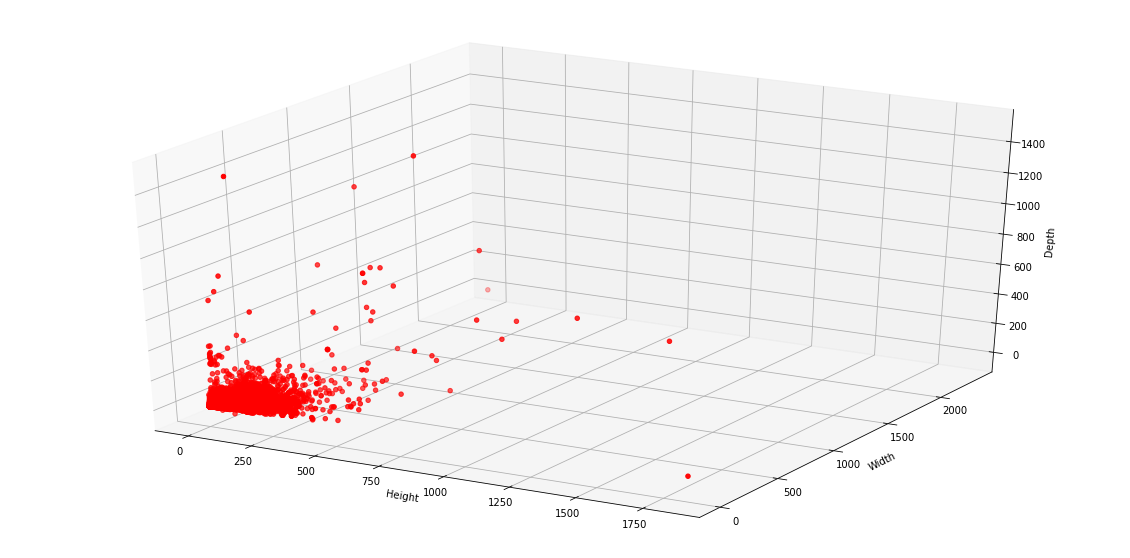

In [60]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_dimensions['Height (cm)'], df_dimensions['Width (cm)'], df_dimensions['Depth (cm)'], c='r', marker='o')

ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Depth')

plt.show()

The good thing about looking for outliers according to 3 columns is that we can visualize simply. Now, I will use k-means method to find some clusters.

In [61]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_dimensions)
y_kmeans = kmeans.predict(df_dimensions)

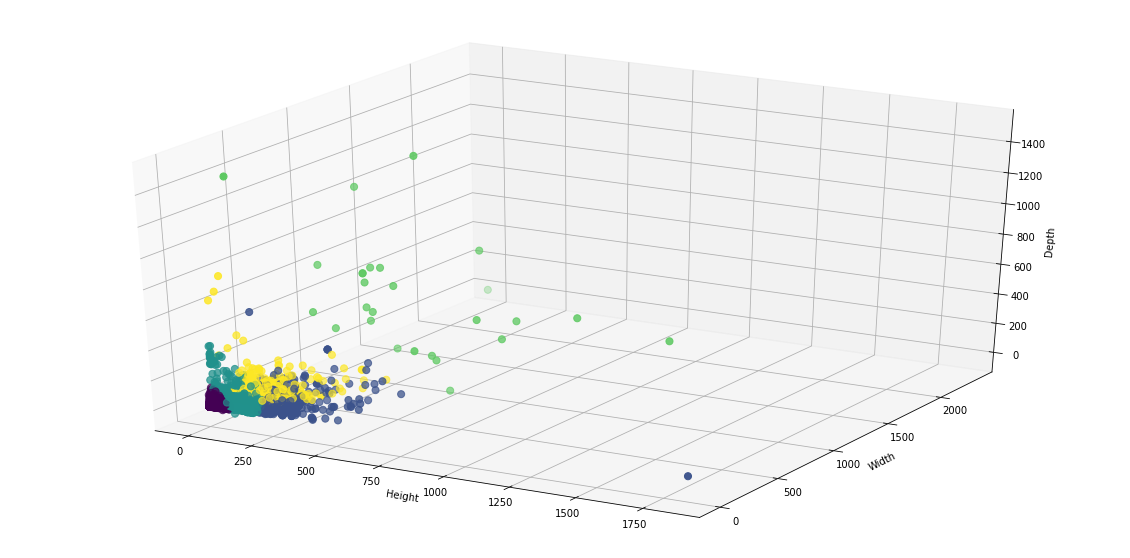

In [62]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_dimensions['Height (cm)'], df_dimensions['Width (cm)'], df_dimensions['Depth (cm)'], c=y_kmeans, s=50, cmap='viridis')

ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Depth')

plt.show()


On the plot, we can say that light green dots (and the dark blue one on the right) are the dimensions outliers.